In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
# import openpyxl

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Job skills to list 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\MateuszSz\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']...",1
332,Data Analyst,Data Analyst,"Mossville, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-27 13:01:50,False,False,United States,None,NaN,NaN,Aditi Consulting,"[python, matlab, c++, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",4
385,Data Analyst,Data Analyst,"Waukesha, WI",via Trabajo.org,Full-time,False,"Illinois, United States",2023-02-11 13:04:12,False,True,United States,None,NaN,NaN,Uline,"[vba, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",2
476,Data Analyst,Data Analyst,"St Peters, MO",via Trabajo.org,Full-time,False,"Illinois, United States",2023-01-15 13:02:07,True,True,United States,None,NaN,NaN,"BizzyCar, Inc.",[tableau],{'analyst_tools': ['tableau']},1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784841,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,None,NaN,NaN,Blue Shield of CA,"[sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint...",1
784929,Data Analyst,Data Analyst,"Pleasant Hill, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-12 06:01:41,False,True,United States,None,NaN,NaN,Special Olympics of Northern California,"[sql, azure, sheets, spreadsheet, excel, share...","{'analyst_tools': ['sheets', 'spreadsheet', 'e...",5
785078,Data Analyst,Data Analyst,"Columbia, SC",via Trabajo.org,Full-time,False,Georgia,2023-03-24 06:54:14,True,False,United States,None,NaN,NaN,"Hornet Staffing, Inc.","[sql, visual basic, sas, sas, db2]","{'analyst_tools': ['sas'], 'databases': ['db2'...",3
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud...",1


In [13]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [14]:
# Group by month and job_skills
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [15]:
# sorts by count
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


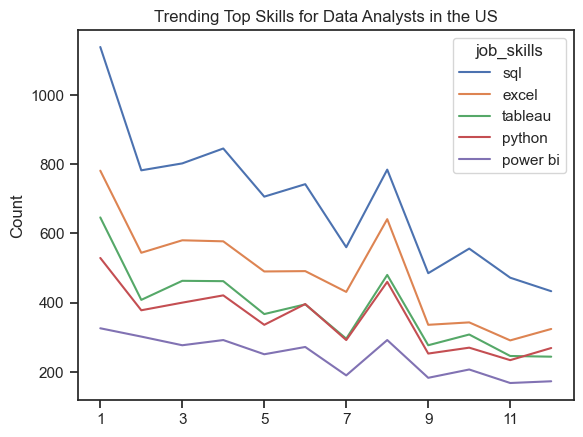

In [16]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [17]:
# Get monthly totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [18]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
sty,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
lut,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
kwi,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
maj,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
cze,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
lip,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
sie,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
wrz,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


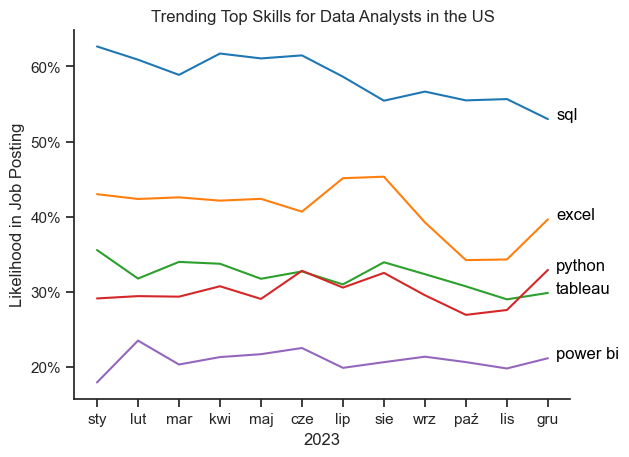

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()